# **Introduction**

Fashion-MNIST is a dataset of images that is widely used as a benchmark in the field of computer vision. It is composed of 70,000 grayscale images of 28x28 pixels, showing clothing items from 10 different categories, including T-shirts, dresses, sneakers, and more.

The Fashion-MNIST dataset was created as a more challenging alternative to the well-known MNIST dataset, which consists of handwritten digits. The goal of Fashion-MNIST is to develop and test machine learning algorithms for image classification and pattern recognition.

The dataset is split into 60,000 training images and 10,000 testing images. Each image is labeled with a corresponding class, ranging from 0 to 9, which represents the category of the clothing item that is depicted.

Fashion-MNIST is a popular dataset in the machine learning community due to its simplicity and the fact that it provides a more realistic task than MNIST. It has been used to train and evaluate various types of deep learning models, including convolutional neural networks (CNNs), and has led to the development of several state-of-the-art algorithms in image classification.

In summary, the Fashion-MNIST dataset is a valuable resource for anyone interested in learning about image classification, and it provides a challenging benchmark for evaluating machine learning algorithms in this area.


### **Objective:** 
To develop and evaluate a convolutional neural network (CNN) model to classify images of clothing items in the Fashion-MNIST dataset.

### **Questions**

1-Can a CNN model be trained to accurately classify clothing items in the Fashion-MNIST dataset?

2-What is the optimal architecture and hyperparameters for the CNN model to achieve high accuracy?

3-How does the CNN model compare to other state-of-the-art algorithms on the Fashion-MNIST dataset?

4-Can the CNN model generalize well to unseen data, and what measures can be taken to improve its generalization performance?

5-What insights can be gained from the CNN model's performance and misclassifications, and how can they be used to improve the model or the dataset itself?

## **1-Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report,confusion_matrix

# Set the random seed for numpy and tensorflow
np.random.seed(42)
tf.random.set_seed(42)

### **2-Load the fashion-MNIST dataset:**

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
#defining class labels
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


### **Visualization:**

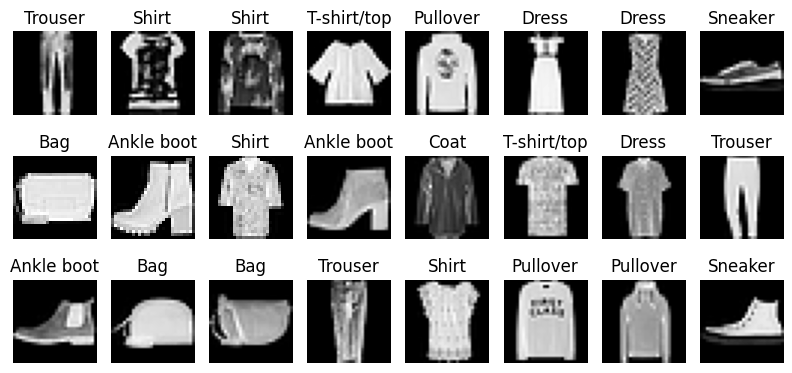

In [5]:
# Display a few random images with their corresponding labels
fig, axes = plt.subplots(nrows=3, ncols=8, figsize=(8, 4))
axes = axes.flatten()
for i in range(len(axes)):
    # Choose a random index
    idx = np.random.randint(len(x_train))
    # Plot the image and its label
    axes[i].imshow(x_train[idx], cmap='gray')
    axes[i].set_title(class_labels[y_train[idx]])
    axes[i].axis('off')
plt.tight_layout()
plt.show()

### **3-splitting dataset into training and validating set, Data augmentation and preprocessing**

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255,  # rescale pixel values from [0, 255] to [0, 1]
    preprocessing_function=lambda x: (x - 0.5) / 0.5  # normalize pixel values to have mean 0 and std 1
)

# Create a generator that generates augmented and preprocessed images
train_generator = train_datagen.flow(
    x_train.reshape((-1, 28, 28, 1)),
    y_train,
    batch_size=32,
)


# Create a generator for the validation data
val_generator = ImageDataGenerator(rescale=1./255).flow(
    x_test.reshape((-1, 28, 28, 1)),
    y_test,
    batch_size=32,
)


### **Visualizing augmented images**

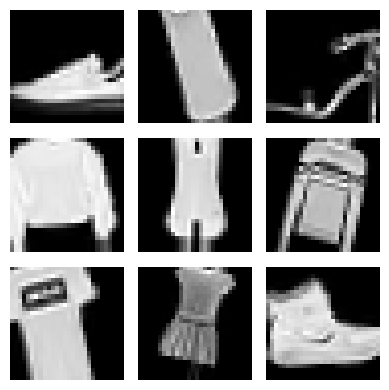

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate augmented images and plot them
augmented_images = train_datagen.flow(x_train[:9].reshape((-1, 28, 28, 1)), batch_size=9)[0]

fig, axes = plt.subplots(3, 3, figsize=(4, 4))
axes = axes.flatten()
for img, ax in zip(augmented_images, axes):
    ax.imshow(np.squeeze(img), cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()


In [8]:

# Convert labels to one-hot encoding
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### **4-Defining the model architecture:**

In [9]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

#After defining the architecture of the model, we need to compile it before training. 
#This is done by calling the compile() method of the model object, and passing in the required arguments for optimizer, loss function, and metrics.
#compile the model

from tensorflow.keras.optimizers import Adamax

opt = tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 256)         295168    
                                                                 
 flatten (Flatten)           (None, 2304)              0

In [10]:
#Batch processing
#Early Stopping
# This callback will stop the training when there is no improvement in
# the loss for 5 consecutive epochs.

from tensorflow.keras.callbacks import EarlyStopping

early_stop=EarlyStopping(monitor='val_loss',patience=4)

batch_size = 64
num_epochs = 10

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_test, y_test))


Epoch 1/10
938/938 [==============================] - 219s 232ms/step - loss: 0.7733 - accuracy: 0.7499 - val_loss: 0.4110 - val_accuracy: 0.8577
Epoch 2/10
938/938 [==============================] - 215s 229ms/step - loss: 0.4431 - accuracy: 0.8436 - val_loss: 0.3655 - val_accuracy: 0.8673
Epoch 3/10
938/938 [==============================] - 219s 233ms/step - loss: 0.3703 - accuracy: 0.8691 - val_loss: 0.3225 - val_accuracy: 0.8799
Epoch 4/10
938/938 [==============================] - 211s 225ms/step - loss: 0.3234 - accuracy: 0.8856 - val_loss: 0.2993 - val_accuracy: 0.8924
Epoch 5/10
938/938 [==============================] - 219s 233ms/step - loss: 0.2871 - accuracy: 0.8981 - val_loss: 0.2924 - val_accuracy: 0.8981
Epoch 6/10
938/938 [==============================] - 216s 230ms/step - loss: 0.2579 - accuracy: 0.9070 - val_loss: 0.2774 - val_accuracy: 0.8994
Epoch 7/10
938/938 [==============================] - 215s 229ms/step - loss: 0.2327 - accuracy: 0.9165 - val_loss: 0.2862 -

### **5- Evaluating the model on the test set and computing the confusion matrix**

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.2647685408592224
Test accuracy: 0.9103999733924866


In [12]:
from sklearn.metrics import confusion_matrix

# Get the predictions for the test data
y_pred = model.predict(x_test)

# Convert the predictions into class labels
y_pred = np.argmax(y_pred, axis=1)

# Get the true class labels
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Compute classification metrics
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

313/313 [==============================] - 7s 20ms/step
Confusion Matrix:
 [[880   0  14  14   1   1  87   1   2   0]
 [  1 977   0  16   2   0   1   0   3   0]
 [ 21   0 841   9  58   0  68   0   3   0]
 [ 17   1   9 932  14   0  24   0   3   0]
 [  1   0  40  31 869   0  57   0   2   0]
 [  0   0   0   0   0 969   0  23   0   8]
 [112   0  53  28  74   0 724   0   9   0]
 [  0   0   0   0   0   5   0 985   0  10]
 [  2   0   1   5   3   2   5   4 978   0]
 [  1   0   0   0   0   5   0  45   0 949]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.88      0.84      0.86      1000
           3       0.90      0.93      0.92      1000
           4       0.85      0.87      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.75      0.72      0.74      1000
           7       0.93      0.98    

**Creating a heatmap for confusion matrix**

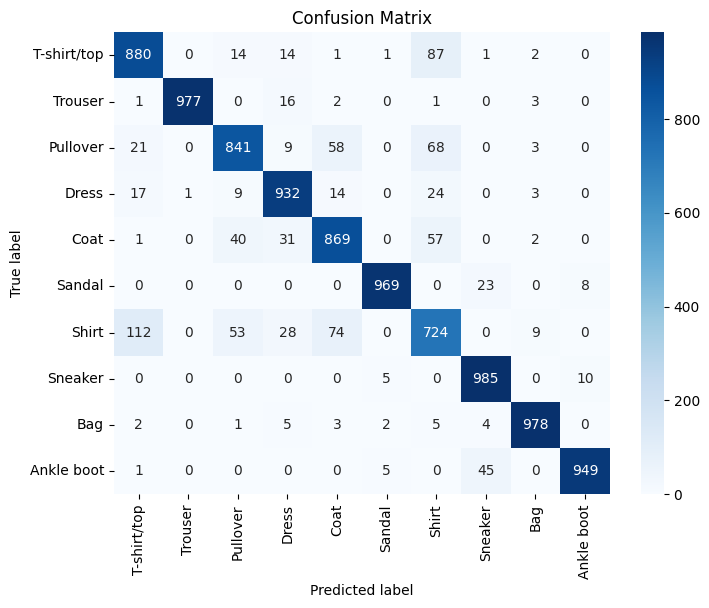

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the class labels for the confusion matrix
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Create the heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, ax=ax)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
plt.show()

## **Visualization**

This code selects a random sample of images from the test set and displays them in subplots. The top row shows images that were classified correctly, with the true label and predicted label displayed in the title. The bottom row shows images that were misclassified, with the true label, predicted label, and title displayed in red.


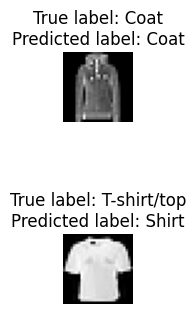

In [22]:
# Show one correctly classified image and one misclassified image
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(1, 5))
fig.tight_layout()

# Show one correctly classified image
correct_index = np.random.choice(np.where(y_pred == y_true)[0])
ax[0].imshow(x_test[correct_index], cmap='gray')
ax[0].set_title("True label: {}\nPredicted label: {}".format(class_labels[y_true[correct_index]], class_labels[y_pred[correct_index]]))
ax[0].axis('off')

# Show one misclassified image
misclassified_index = np.random.choice(np.where(y_pred != y_true)[0])
ax[1].imshow(x_test[misclassified_index], cmap='gray')
ax[1].set_title("True label: {}\nPredicted label: {}".format(class_labels[y_true[misclassified_index]], class_labels[y_pred[misclassified_index]]))
ax[1].axis('off')

plt.tight_layout()
plt.show()


### **6- Visualize the training history**

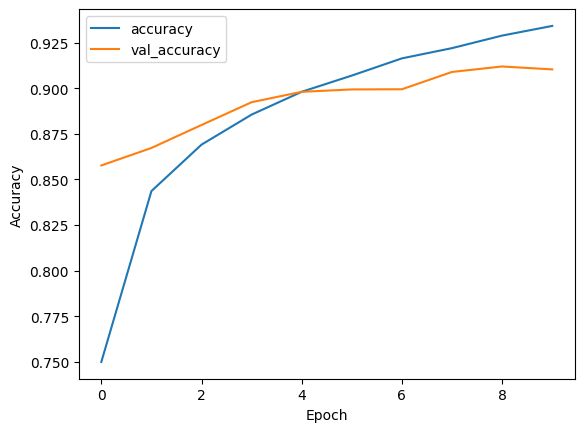

In [23]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### **Saving the model**

This will save the entire model architecture, including the weights and optimizer state. You can load the saved model later

In [24]:
model.save("fashion_mnist_cnn_model.h5")

## **Conclusion**

From the given classification report, we can conclude that the overall accuracy of the model is 91%, which means the model was able to correctly classify 91% of the test images.

The precision score for each class indicates the percentage of correctly predicted instances for that class out of all instances predicted as that class. The recall score for each class indicates the percentage of correctly predicted instances for that class out of all instances that belong to that class. The F1 score is the harmonic mean of precision and recall, and provides a balanced measure of the model's performance.

Based on the precision, recall and F1 scores, we can see that the model has high performance for classes 1, 3, 5, 7, 8, and 9 with F1 scores of 0.92 or higher. For classes 0, 2, and 4, the model has relatively lower F1 scores, indicating that the model struggles to correctly classify these classes.

The macro and weighted average F1 scores are both 0.91, which indicates that the overall performance of the model is balanced across all classes.

The plot shows the change in training and validation accuracy over each epoch during the training of the CNN model on the dataset. It helps to analyze the performance of the model over time, and to identify if the model is overfitting or underfitting.In this specific case, the plot shows that the training accuracy and validation accuracy increase together with each epoch, which indicates that the model is fitting the data well without overfitting or underfitting. However it tends to get overfitted after afew epochs, so the model has to stop further trainings.

References: 

https://www.kaggle.com/datasets/zalando-research/fashionmnist

https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/

https://www.tensorflow.org/tutorials/keras/classification
